## 1) WHEN WE KNOW THE CIRCUIT MODEL IN ADVANCE, WE CAN DIRECTLY USE THE LIBRARY

In [3]:
from impedance import preprocessing

In [4]:
frequencies, Z = preprocessing.readCSV('./exampleData.csv')

In [5]:
frequencies, Z = preprocessing.ignoreBelowX(frequencies, Z)

In [6]:
# here we are assuming that we know the correct circuit model and are estimating the parameters
from impedance.models.circuits import CustomCircuit

circuit = 'R0-p(R1,C1)-p(R2-Wo1,C2)'
initial_guess = [.01, .01, 100, .01, .05, 100, 1]

circuit = CustomCircuit(circuit, initial_guess=initial_guess)

In [7]:
circuit.fit(frequencies, Z)

In [8]:
circuit.parameters_

array([1.65187261e-02, 8.67655053e-03, 3.32142554e+00, 5.38996275e-03,
       6.30927435e-02, 2.32520435e+02, 2.19541825e-01])

In [9]:
# for prediction of impedances using the .predict() method on the frequencies
Z_fit = circuit.predict(frequencies)

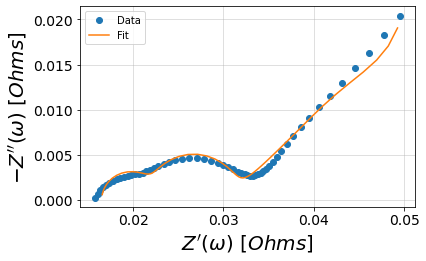

In [10]:
import matplotlib.pyplot as plt
from impedance.visualization import plot_nyquist

fig, ax = plt.subplots()
plot_nyquist(ax, Z, fmt='o')
plot_nyquist(ax, Z_fit, fmt='-')

plt.legend(['Data', 'Fit'])
plt.show()

Hence this equivalent circuit fits the data well!

## 2) WHEN WE DO NOT KNOW THE CIRCUIT MODEL IN ADVANCE

We can use Nyquist plot characteristics and a free GUI tool to determine the circuit model:
https://www.gamry.com/assets/Application-Notes/Equivalent-Circuit-Modeling-in-EIS.pdf

We can then use the same procedure as above for model fitting